In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
model = Sequential()
# We are learning 64
# filters with a kernel size of 5x5
model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))
    
# Max pooling will reduce the
# size with a kernel size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# Once the convolutional and pooling
# operations are done the layer
# is flattened and fully connected layers
# are added
model.add(Flatten())
model.add(Dense(32, activation="relu"))
    
# Finally as there are total 10
# classes to be added a FCC layer of
# 10 is created with a softmax activation
# function
model.add(Dense(10, activation="softmax"))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/8
430/430 [==============================] - 174s 403ms/step - loss: 0.5367 - accuracy: 0.8052 - val_loss: 0.3356 - val_accuracy: 0.8824
Epoch 2/8
430/430 [==============================] - 167s 389ms/step - loss: 0.3195 - accuracy: 0.8850 - val_loss: 0.2883 - val_accuracy: 0.8924
Epoch 3/8
430/430 [==============================] - 165s 383ms/step - loss: 0.2642 - accuracy: 0.9046 - val_loss: 0.2654 - val_accuracy: 0.8988
Epoch 4/8
430/430 [==============================] - 162s 376ms/step - loss: 0.2299 - accuracy: 0.9170 - val_loss: 0.2432 - val_accuracy: 0.9116
Epoch 5/8
430/430 [==============================] - 163s 380ms/step - loss: 0.2035 - accuracy: 0.9256 - val_loss: 0.2251 - val_accuracy: 0.9164
Epoch 6/8
430/430 [==============================] - 185s 430ms/step - loss: 0.1780 - accuracy: 0.9343 - val_loss: 0.2216 - val_accuracy: 0.9180
Epoch 7/8
430/430 [==============================] - 185s 430ms/step - loss: 0.1600 - accuracy: 0.9407 - val_loss: 0.2196 - val_ac

In [9]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 6s 20ms/step - loss: 37.1899 - accuracy: 0.8997
[37.189910888671875, 0.8996999859809875]


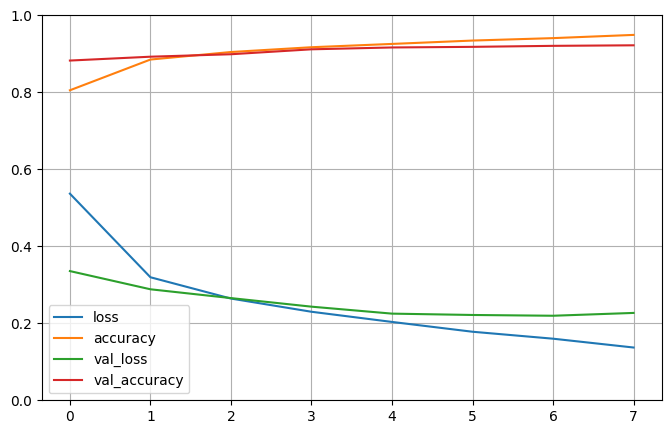

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 6s 19ms/step


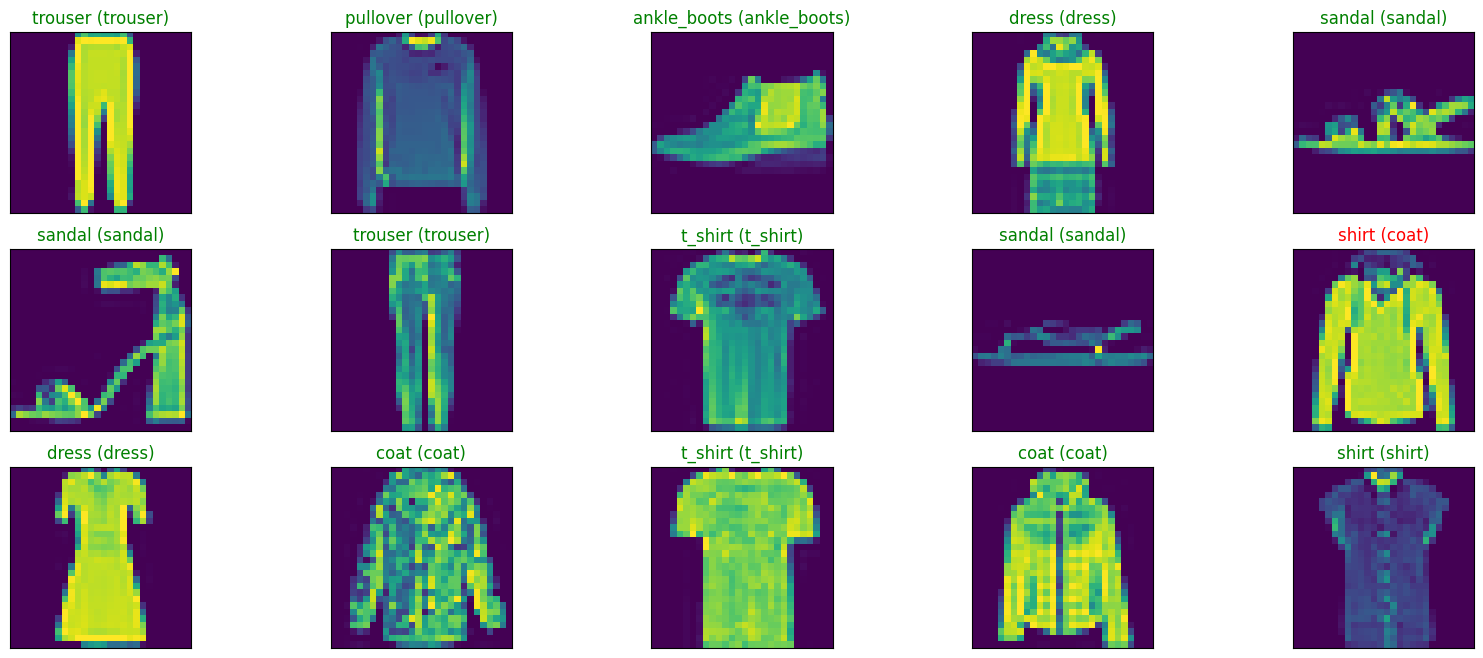

In [11]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))